# Introduction

The following code addresses US15, where we aim to predict the average monthly cost associated with water consumption in each park based on its size. Using linear regression, we'll model the relationship between the area of the park and the monthly cost spent on water consumption. This analysis will provide valuable insights for the park management company to anticipate and manage water consumption expenses efficiently.




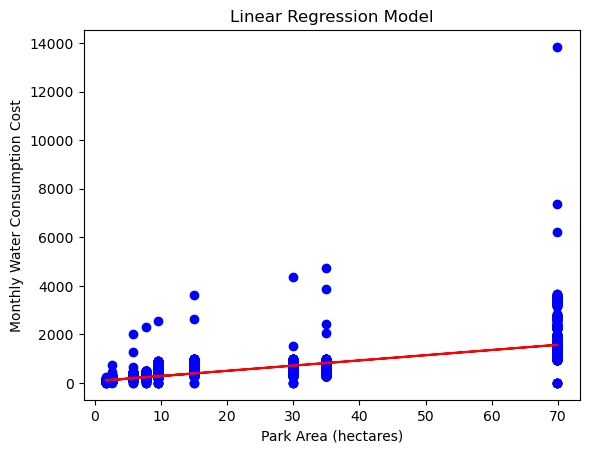

Predicted monthly water consumption cost for the new 55-hectare park: 1248.750403605111
Mean Squared Error: 201194.677324753


C:\Users\Amorim\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

water_df = pd.read_csv('water_consumption_updated.csv', delimiter=';')
area_df = pd.read_csv('Area.csv', delimiter=';')

water_df['Consumption'] = water_df['Consumption'].str.replace(',', '.').astype(float)
area_df['Area'] = area_df['Area'].str.replace(',', '.').astype(float)

merged_df = pd.merge(water_df, area_df, on='Park')

X = merged_df[['Area']]
y = merged_df['Consumption'] * 30 * 0.5  

model = LinearRegression()
model.fit(X, y)

plt.scatter(X, y, color='blue')
plt.plot(X, model.predict(X), color='red')
plt.title('Linear Regression Model')
plt.xlabel('Park Area (hectares)')
plt.ylabel('Monthly Water Consumption Cost')
plt.show()

new_park_area = [[55]]  
predicted_cost = model.predict(new_park_area)
print(f'Predicted monthly water consumption cost for the new 55-hectare park: {predicted_cost[0]}')

y_pred = model.predict(X)
mse = mean_squared_error(y, y_pred)
print(f'Mean Squared Error: {mse}')
